This notebook attempts to figure out how manually change the support vectors of a trained model. It doesn't work for reasons that escape me.

In [1]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import numpy as np
import pandas as pd
import pickle
import ieeg_funcs as ief
import dgFuncs as dg
import matplotlib.pyplot as plt
%matplotlib inline
import imp 
import mtspec

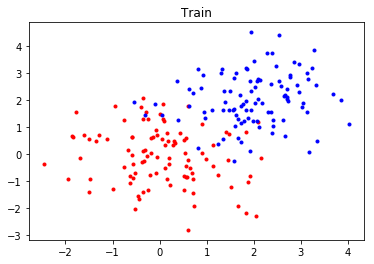

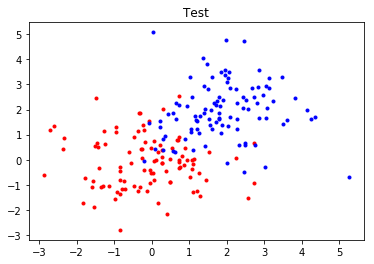

In [2]:
from sklearn import svm
n=100
offset=2
x=np.zeros((2,2*n))
x[:,:n]=np.random.randn(2,n)
x[:,n:]=np.random.randn(2,n)+offset
y=np.zeros(2*n)
y[100:]=1

plt.figure(1)
plt.clf()
plt.plot(x[0,:n],x[1,:n],'r.')
plt.plot(x[0,n:],x[1,n:],'b.')
plt.title('Train')

xx=np.zeros((2,2*n))
xx[:,:n]=np.random.randn(2,n)
xx[:,n:]=np.random.randn(2,n)+offset
yy=np.zeros(2*n)
yy[100:]=1

plt.figure(2)
plt.clf()
plt.plot(xx[0,:n],xx[1,:n],'r.')
plt.plot(xx[0,n:],xx[1,n:],'b.')
plt.title('Test')

In [19]:
clf1 = svm.SVC(C=1)
clf1.fit(x.T, y) 

yy_hat=clf1.predict(xx.T)
print('Accuracy=%f' % np.mean(yy_hat==yy))
print('# of SVs {}'.format(clf1.n_support_))

Accuracy=0.905000
# of SVs [27 27]


In [20]:
print(clf1.dual_coef_.shape)
print(clf1.dual_coef_)
print(np.sum(clf1.dual_coef_>=0))
print(np.sum(clf1.dual_coef_<0))

(1, 54)
[[-1.         -1.         -1.         -0.36004419 -1.         -1.
  -0.6083281  -1.         -0.37793634 -1.         -0.63077963 -1.         -1.
  -1.         -0.23934759 -1.         -1.         -0.34993505 -1.         -1.
  -0.40229813 -0.27985993 -1.         -0.53905513 -1.         -1.         -1.
   1.          1.          1.          0.20149647  1.          1.          1.
   1.          0.67183927  1.          1.          0.10123713  1.
   0.79943227  0.69969614  0.24943028  0.19223201  1.          1.
   0.59792476  1.          1.          1.          0.27429577  1.          1.
   1.        ]]
27
27


In [21]:
clf1.support_vectors_.shape

(54, 2)

In [27]:
clf1.probB_

array([], dtype=float64)

In [67]:
# Compare values of two different models
print(clf2.tol)
print(clf1.tol)

0.001
0.001


(64, 2)
CLF2 Accuracy
Accuracy=0.915000
# of SVs [33 31]
CLF1 Accuracy
Accuracy=0.905000
# of SVs [27 27]
CLF1 copied to CLF2 Accuracy
Accuracy=0.760000
# of SVs [27 27]


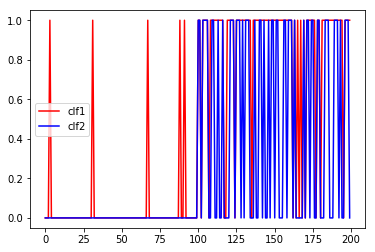

In [69]:
# TRAIN A 2nd SVM and then try to copy over the support vector info from the first SVM to make it act like thw first SVM
clf2 = svm.SVC(C=1)
clf2.fit(xx.T, yy) 
print(clf2.support_vectors_.shape)

print('CLF2 Accuracy')
yy_hat=clf2.predict(xx.T)
print('Accuracy=%f' % np.mean(yy_hat==yy))
print('# of SVs {}'.format(clf2.n_support_))

print('CLF1 Accuracy')
yy_hat1=clf1.predict(xx.T)
print('Accuracy=%f' % np.mean(yy_hat1==yy))
print('# of SVs {}'.format(clf1.n_support_))

print('CLF1 copied to CLF2 Accuracy')
clf2.dual_coef_=clf1.dual_coef_
clf2.intercept_=clf1.intercept_
clf2.n_support_=clf1.n_support_
clf2.support_=clf1.support_
clf2.support_vectors_=clf1.support_vectors_
clf2.shape_fit_=clf1.shape_fit_
yy_hat12=clf2.predict(xx.T)
print('Accuracy=%f' % np.mean(yy_hat12==yy))
print('# of SVs {}'.format(clf2.n_support_))

# Plot predictions
plt.figure(1)
plt.clf()
plt.plot(yy_hat1,'r-',label='clf1')
plt.plot(yy_hat12,'b-',label='clf2')
plt.legend()

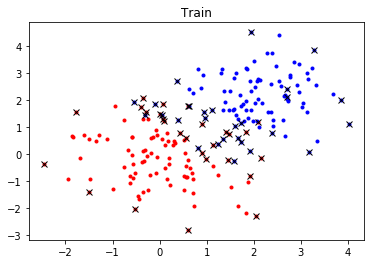

In [71]:
# Plot the support vectors of SVM1
plt.figure(1)
plt.clf()
plt.plot(x[0,:n],x[1,:n],'r.')
plt.plot(x[0,n:],x[1,n:],'b.')
plt.plot(clf1.support_vectors_[:,0],clf1.support_vectors_[:,1],'xk')
plt.title('Train')

In [28]:
clf.support_vectors_.shape

(65, 2)

In [32]:
clf.support_.shape

(65,)

In [31]:
clf.dual_coef_.shape

(1, 65)

In [34]:
type(clf.dual_coef_)

numpy.ndarray

In [36]:
np.min(clf.dual_coef_)

-1.0

In [21]:
clf.class_weight_

array([ 1.,  1.])